# Lane Boundary Projection

## Setting up Colab

In [1]:
!ls

__init__.py			   lane_boundary_projection.ipynb
camera_geometry_unit_test.py	   lane_detector.ipynb
inverse_perspective_mapping.ipynb


## Introduction

在本练习中，我们将应用图像形成知识为我们的深度学习模型创建标签数据。 为了训练该模型，我们需要大量（输入、输出）示例。 输入是来自我们车辆挡风玻璃后面的摄像头的图像。 对于预期的模型输出，我们需要将图像中的每个像素标记为左边车道线、右边车道线，或者两者都不是。

使用 Carla 获取图像很容易：我们可以将摄像头安装到车辆上并存储该摄像头拍摄的图像。 If you want to see details, you can check out `collect_data.py`. Let's have a look at an exemplary image:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import cv2

(512, 1024, 3)

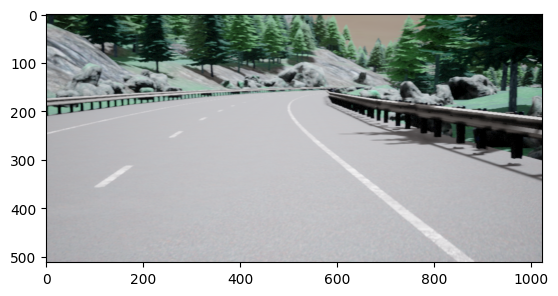

In [3]:
image_fn = str(Path("../../../data/Town04_Clear_Noon_09_09_2020_14_57_22_frame_625_validation_set.png"))
image = cv2.imread(image_fn)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
image.shape

Each time the `collect_data.py` captures an image, 它还在世界坐标中的多项式 ，分别代表左右车道边界。

Zw-coords:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(60, 3)
(60, 3)
(60,)
(4, 60)


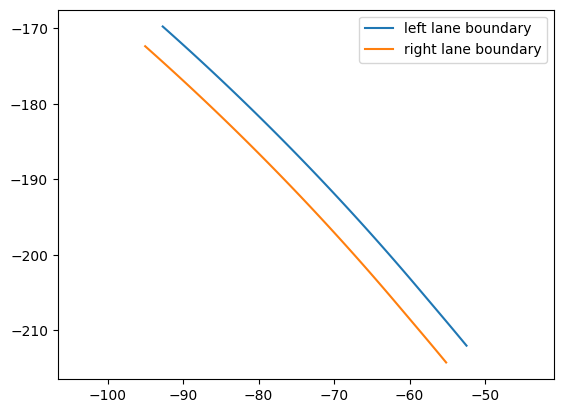

In [24]:
boundary_fn = image_fn.replace(".png", "_boundary.txt")
boundary_gt = np.loadtxt(boundary_fn)
# exploit that in the Carla world coordinates the road is mostly in the Xw-Yw plane
print("Zw-coords: ", boundary_gt[:,2])
plt.plot(boundary_gt[:,0], boundary_gt[:,1], label="left lane boundary")
plt.plot(boundary_gt[:,3], boundary_gt[:,4], label="right lane boundary")
plt.axis("equal")
plt.legend();
print(boundary_gt[:,0:3].shape)


temp = boundary_gt[:,0:3]
print(temp.shape)
c = np.ones(temp.shape[0]).transpose()
print(c.shape)
X = np.insert(temp,3,values=c,axis=1)#对原始数据加入一个全为1的列
print(X.T.shape)


Now to get the label image, we need to take the world coordinates of the lane boundaries, transform them into the camera coordinate system, and then project them to image coordinates $(u,v)$ using the intrinsic matrix $K$.
The transformation from the world coordinate frame to the camera centered camera frame depends on the pose of the vehicle, to which the camera is attached. Carla makes it easy to obtain such transformation matrices, and we actually stored the transformation matrix corresponding to the image we are just looking at. Let's load it:

In [23]:
trafo_fn = image_fn.replace(".png", "_trafo.txt")
trafo_world_to_cam = np.loadtxt(trafo_fn)
print(trafo_world_to_cam)



[[-7.08870530e-01 -7.05338657e-01  0.00000000e+00 -1.88616669e+02]
 [ 6.14743105e-02 -6.17821335e-02 -9.96194720e-01 -8.59588751e+00]
 [-7.02654646e-01  7.06173079e-01 -8.71557370e-02  1.13167282e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
(5, 5)
[[-7.08870530e-01 -7.05338657e-01  0.00000000e+00 -1.88616669e+02
   0.00000000e+00]
 [ 6.14743105e-02 -6.17821335e-02 -9.96194720e-01 -8.59588751e+00
   0.00000000e+00]
 [-7.02654646e-01  7.06173079e-01 -8.71557370e-02  1.13167282e+02
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00]]


In [79]:
import numpy.matlib 
K=np.matlib.empty((3,3))
c = np.zeros(3).transpose()
temp = K
#print(temp)
temp= np.insert(temp,3,values=c,axis=1)#对原始数据加入一个全为1的列

temp[2,3]=1.
print(temp.shape)#(3,4)

K2=np.matlib.empty((4,4))
K3=np.matlib.empty((4,60))
print((temp*K2*K3)[0:2,:].T.shape)
print(K2)

print(1/K2[1,1]*(K2[1,:]))

(3, 4)
(60, 2)
[[-7.08870530e-01 -7.05338657e-01  0.00000000e+00 -1.88616669e+02]
 [ 6.14743105e-02 -6.17821335e-02 -9.96194720e-01 -8.59588751e+00]
 [-7.02654646e-01  7.06173079e-01 -8.71557370e-02  1.13167282e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ -0.9950176    1.          16.12431724 139.13225441]]


Now we can project the polyline into our original image. This is where the exercise starts

## Exercise

Solve the TODO items in `exercises/lane_detection/camera_geometry.py` which are labeled as **"TODO step 1"**.

The cells below will help you check if your implementation is correct. You might want to read them before you start with your implementation.

### Unit test

In [107]:
# execute this cell to run unit tests on your implementation of step 1
%cd ../../../
!python -m code.tests.lane_detection.camera_geometry_unit_test 1
%cd -

/var/Algorithms-for-Automated-Driving-master
-------------------------
Running tests for step  1
-------------------------
(60, 3)
[[-7.71380796e+03  5.88844251e+03  2.80988548e-01]
 [-1.40353610e+03  1.42277625e+03  1.26520879e+00]
 [-6.13960704e+02  8.64869600e+02  2.24966659e+00]
 [-3.04185082e+02  6.46584900e+02  3.23430781e+00]
 [-1.38314512e+02  5.30172118e+02  4.21913683e+00]
 [-3.46917937e+01  4.57809662e+02  5.20414967e+00]
 [ 3.66042090e+01  4.08295433e+02  6.19355707e+00]
 [ 8.84551930e+01  3.72310576e+02  7.18652194e+00]
 [ 1.27717073e+02  3.45062624e+02  8.17948681e+00]
 [ 1.58478354e+02  3.23714133e+02  9.17245168e+00]
 [ 1.83230068e+02  3.06536312e+02  1.01654166e+01]
 [ 2.03524179e+02  2.92520094e+02  1.11503322e+01]
 [ 2.20789546e+02  2.80798881e+02  1.21334360e+01]
 [ 2.35744834e+02  2.70832776e+02  1.31167463e+01]
 [ 2.48869420e+02  2.62254699e+02  1.41003038e+01]
 [ 2.60521257e+02  2.54794282e+02  1.50840056e+01]
 [ 2.70972480e+02  2.48245983e+02  1.60679265e+01]
 [

## Test by visual inspection

When you change the boolean below to `True`, your code will be run. Otherwise the sample solution will be run. The images that the code generates should be the same for your code and the sample solution.

In [121]:
run_student_code = True

In [122]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
sys.path.append(str(Path('../../')))
if run_student_code:
    from exercises.lane_detection import camera_geometry
else:
    from solutions.lane_detection import camera_geometry

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [123]:
cg = camera_geometry.CameraGeometry()
K = cg.intrinsic_matrix
print(K)

[[1.23607734e+03 0.00000000e+00 5.12000000e+02]
 [0.00000000e+00 1.23607734e+03 2.56000000e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


(60, 3)
[[-7.71380796e+03  5.88844251e+03  2.80988548e-01]
 [-1.40353610e+03  1.42277625e+03  1.26520879e+00]
 [-6.13960704e+02  8.64869600e+02  2.24966659e+00]
 [-3.04185082e+02  6.46584900e+02  3.23430781e+00]
 [-1.38314512e+02  5.30172118e+02  4.21913683e+00]
 [-3.46917937e+01  4.57809662e+02  5.20414967e+00]
 [ 3.66042090e+01  4.08295433e+02  6.19355707e+00]
 [ 8.84551930e+01  3.72310576e+02  7.18652194e+00]
 [ 1.27717073e+02  3.45062624e+02  8.17948681e+00]
 [ 1.58478354e+02  3.23714133e+02  9.17245168e+00]
 [ 1.83230068e+02  3.06536312e+02  1.01654166e+01]
 [ 2.03524179e+02  2.92520094e+02  1.11503322e+01]
 [ 2.20789546e+02  2.80798881e+02  1.21334360e+01]
 [ 2.35744834e+02  2.70832776e+02  1.31167463e+01]
 [ 2.48869420e+02  2.62254699e+02  1.41003038e+01]
 [ 2.60521257e+02  2.54794282e+02  1.50840056e+01]
 [ 2.70972480e+02  2.48245983e+02  1.60679265e+01]
 [ 2.80428201e+02  2.42452315e+02  1.70520397e+01]
 [ 2.89053935e+02  2.37290120e+02  1.80363082e+01]
 [ 2.96975591e+02  2.32

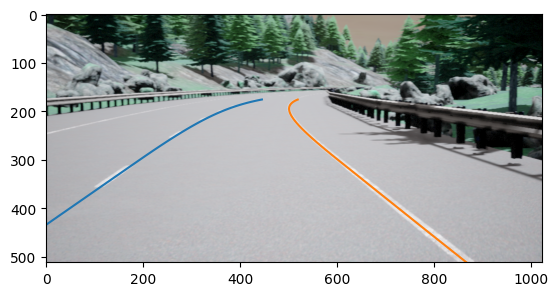

In [124]:
for boundary_polyline in [boundary_gt[:,0:3], boundary_gt[:,3:]]:
    uv = camera_geometry.project_polyline(boundary_polyline, trafo_world_to_cam, K)
    u,v = uv[:,0], uv[:,1]
    plt.plot(u,v)
plt.imshow(image);

## Bonus information
The image above is good, but not in the proper format if we want to use it to train a neural net for image segmentation.
Here, I quickly show you how to get label images in the proper format. You can skip this section if you want.

(60, 3)
[[-7.71380796e+03  5.88844251e+03  2.80988548e-01]
 [-1.40353610e+03  1.42277625e+03  1.26520879e+00]
 [-6.13960704e+02  8.64869600e+02  2.24966659e+00]
 [-3.04185082e+02  6.46584900e+02  3.23430781e+00]
 [-1.38314512e+02  5.30172118e+02  4.21913683e+00]
 [-3.46917937e+01  4.57809662e+02  5.20414967e+00]
 [ 3.66042090e+01  4.08295433e+02  6.19355707e+00]
 [ 8.84551930e+01  3.72310576e+02  7.18652194e+00]
 [ 1.27717073e+02  3.45062624e+02  8.17948681e+00]
 [ 1.58478354e+02  3.23714133e+02  9.17245168e+00]
 [ 1.83230068e+02  3.06536312e+02  1.01654166e+01]
 [ 2.03524179e+02  2.92520094e+02  1.11503322e+01]
 [ 2.20789546e+02  2.80798881e+02  1.21334360e+01]
 [ 2.35744834e+02  2.70832776e+02  1.31167463e+01]
 [ 2.48869420e+02  2.62254699e+02  1.41003038e+01]
 [ 2.60521257e+02  2.54794282e+02  1.50840056e+01]
 [ 2.70972480e+02  2.48245983e+02  1.60679265e+01]
 [ 2.80428201e+02  2.42452315e+02  1.70520397e+01]
 [ 2.89053935e+02  2.37290120e+02  1.80363082e+01]
 [ 2.96975591e+02  2.32

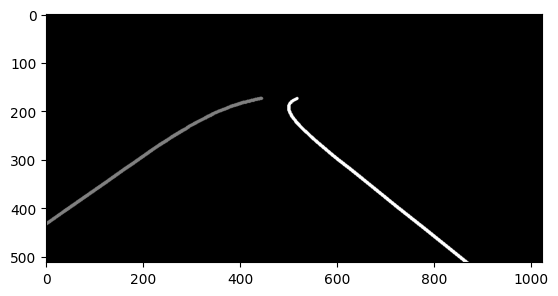

In [125]:
def create_label_img(lb_left, lb_right):
    label = np.zeros((512, 1024, 3))
    colors = [[1, 1, 1], [2, 2, 2]]
    for color, lb in zip(colors, [lb_left, lb_right]):
        cv2.polylines(label, np.int32([lb]), isClosed=False, color=color, thickness=5)
    label = np.mean(label, axis=2)  # collapse color channels to get gray scale
    return label

uv_left = camera_geometry.project_polyline(boundary_gt[:,0:3], trafo_world_to_cam, K)
uv_right = camera_geometry.project_polyline(boundary_gt[:,3:], trafo_world_to_cam, K)

label = create_label_img(uv_left, uv_right)
plt.imshow(label, cmap="gray");
# cv2.imwrite("mylabel.png", label)

请注意，matplotlib的imshow会重新缩放强度，这就是为什么我们可以很好地看到这里的车道边界。如果你用“cv2.imwrite（）”将标签保存为png，并在图像查看程序中打开它，它看起来会全黑。这是因为最大强度为255，因此0.1和2看起来都是黑色的。这不是问题，因为标签图像用于深度学习模型，而不是人眼。 